In [7]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten, AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

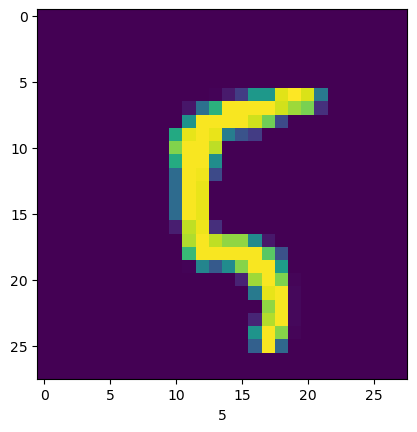

In [6]:
import matplotlib.pyplot as plt

a = 100

plt.xlabel(y_train[a])
plt.imshow(X_train[a])

In [8]:
model = Sequential()

model.add(Conv2D(6,kernel_size=(5, 5),padding='valid', activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Conv2D(16,kernel_size=(5, 5),padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [11]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.3440 - val_loss: 0.0779
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0705 - val_loss: 0.0684
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0490 - val_loss: 0.0500
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0395 - val_loss: 0.0516
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0340 - val_loss: 0.0486
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0270 - val_loss: 0.0529
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0245 - val_loss: 0.0494
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0219 - val_loss: 0.0474
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0179 - val_loss: 0.0486
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0166 - val_loss: 0.0557


In [14]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9865

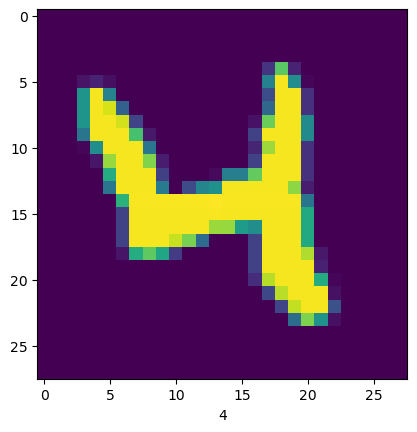

In [17]:
a = 20

plt.xlabel(y_train[a])
plt.imshow(X_train[a])

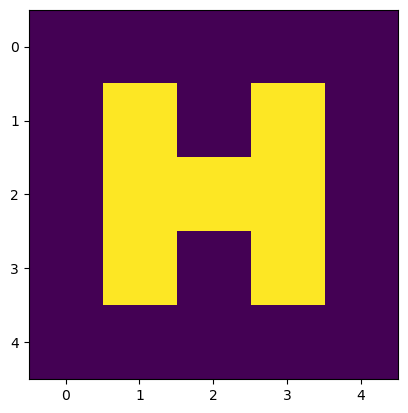

In [57]:
sample = [
    [0, 0, 0, 0, 0],
    [0, 255, 0, 255, 0],
    [0, 255, 255, 255, 0],
    [0, 255, 0, 255, 0],
    [0, 0, 0, 0, 0],
]
plt.imshow(sample)

In [73]:
sample = [
    [0, 0, 0, 0, 0],
    [0, 255, 0, 255, 0],
    [0, 255, 255, 255, 0],
    [0, 255, 0, 255, 0],
    [0, 0, 0, 0, 0],
]



model = Sequential()

model.add(Conv2D(1, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(5, 5, 1)))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

#model.fit(np.array([sample]), np.array([1]), epochs=1)

C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 1)             │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
def convolution2d(image, kernel):
    
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    convolved_image = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            a = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)
            if a <= 0:
                convolved_image[y, x] = 0
            elif a > 255:
                convolved_image[y, x] = 255
            else :
                convolved_image[y, x] = a
            

    return convolved_image

Result of convolution:
[[  0.   0.   0.]
 [  0.   0.   0.]
 [255. 255. 255.]]


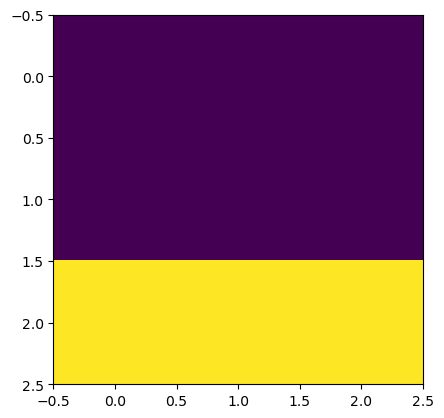

In [83]:
sample = np.array([
    [0, 0, 0, 0, 0],
    [0, 255, 0, 255, 0],
    [0, 255, 255, 255, 0],
    [0, 255, 0, 255, 0],
    [0, 0, 0, 0, 0],
])


kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

result = convolution2d(sample, kernel.T)
print("Result of convolution:")
print(result)
plt.imshow(result)

In [66]:
np.array([sample]).shape

(1, 5, 5)

In [64]:
X_train.shape

(60000, 28, 28)

In [67]:
y_train.shape

(60000,)

In [68]:
np.array([1]).shape

(1,)